# How different is the economic reality in Republican vs. Democrat states, during Covid?

## Exploratory analysis of new jobs listings during the 2020 Covid-19 pandemic

### Project for Galvanize Data Science Immersive, by Mary MacCarthy in Los Angeles


### Table of contents: 
1. Introduction
2. The data
3. Hypothesis
4. Data exploration:
    - required libraries
    - data cleaning
    - analysis
    - hypothesis testing
    - conclusion
5. Further exploration







### 1. Introduction

Covid-19 arrived at a time when the U.S. was experiencing extreme political division: it was a nation led by a controversial president and a bitterly divided Congress, and daily headlines described and denounced the growing polarization between Americans on the right and the left. 

I'm interested in how this divided political situation, and the actions of U.S. political leaders, affected the economic reality of Americans during the pandemic - a public health crisis that unleashed an economic crisis, and a crisis that of course is still ongoing as we speak. 

I come at this project from the perspective of a seasoned political journalist who has covered economic and political issues in-depth as a national correspondent. 

In order to explore the economic reality of the U.S. during Covid, I searched for data sets containing measures of economic health. I settled on a comprehensive and up-to-date collection of new jobs listings in the U.S., reported daily for every state. My goal was that the data would help me to understand if and to what degree the political leanings of each state affect how well its economy is coping during Covid. 



### 2. The data set 
I based my study on the following data set, which I found via a search on AWS Open Data Registry: Covid Job Impacts - US Hiring Data Since March 1 2020. The data is compiled by Greenwich HR Labor Market Intelligence, a consulting firm focused on labor market issues. The data is updated daily; I used the data starting March 1st and ending October 24. 

The data is made up of seven CSV files, containing daily new jobs listings:
- by day
- by day in each state
- by region in each state on each day
- by industry in each state on each day. 

I was interested primarily in the new jobs listings per day in each state. 

My prior knowledge - from my perspective as a journalist and as a citizen - were the following: 
- We know that employment rates dropped dramatically near the start of the pandemic, when some states enacted shelter-in-place policies.
- We know that some of the most populated Democratic states - such as New York and California - enacted strict lockdowns that lasted many weeks.
- We know that some of the most populated Republican-led states - including Texas and Florida - did not at any point enforce strict shelter-in-place policies. 
    
Based on this prior knowledge, my assumption was that - since the start of the pandemic in March - we will see a a significant difference in the average number of jobs listings in Democrat-led states as compared to Republican-led states. 
    
It's important to mention that I did consider to what degree new jobs listings are considered a useful indicator of economic health. Of course, economists disagree over what indicator or combination of indicators are the best representation of the economic health of a country. In the U.S, the Department of Labor's monthly report which forms the basis of most analysis uses new jobs figures as one of its primary indicators. 





### 3. Hypothesis: 

Null hypothesis:
During the Covid era staring March 1 2020, Republican-led states and Democrat-led states have seen an equal number of new jobs listings. 

Alternative hypothesis:
During the Covid era staring March 1 2020, Democrat-led states have seen a significantly lower average rate of new jobs listings than Republican states.


### 4. Data exploration:


#### I began by importing the libraries I will likely need for calculations and plotting in Python:

- Numpy
- Pandas
- Scipy
- MatPlotLib
- Seaborn 

In [132]:
#import libraries

import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import plotly.express as px

#### Next, I cleaned the data. 

Cleaning consisted of the following:

1) I was interested only in the new jobs listings in the 50 U.S. states and Washington D.C., so I removed the overseas territories that were included in the data.

2) I removed "NaN" ("not a number") values when they seemed nonsensical. 

3) I verified that each CSV file I was working with was not missing any data.

4) I looked for the minimum and maximum values in all of the numerical values, to identify any outliers that might need to be removed from the data set. 

5) Text-cleaning code is below. 




#### The dataset has 7 CSV files.
First, I need to read the files into my Jupyter Notebook. 

In [54]:
#read in 7 CSV files as Pandas dataframes 
df_overall = pd.read_csv("/Users/mymac/desktop/capstone_one/Data/overall.csv.part_00000")
df_geo = pd.read_csv("/Users/mymac/desktop/capstone_one/Data/geography.csv.part_00000")
df_geo_ind = pd.read_csv("/Users/mymac/desktop/capstone_one/Data/geography_industry.csv.part_00000")
df_ind = pd.read_csv("/Users/mymac/desktop/capstone_one/Data/industry.csv.part_00000")
df_ind_job_fam = pd.read_csv("/Users/mymac/desktop/capstone_one/Data/industry_job_family.csv.part_00000")
df_job_fam = pd.read_csv("/Users/mymac/desktop/capstone_one/Data/job_family.csv.part_00000")
df_job_fam_role = pd.read_csv("/Users/mymac/desktop/capstone_one/Data/job_family_role.csv.part_00000")

In [55]:
#examining basic information in each CSV file 
df_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         238 non-null    object 
 1   count_id_indexed  238 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


In [56]:
#examining basic information in each CSV file 
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14267 entries, 0 to 14266
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         14267 non-null  object 
 1   state             14029 non-null  object 
 2   count_id_indexed  14267 non-null  float64
dtypes: float64(1), object(2)
memory usage: 334.5+ KB


In [57]:
# examining basic information in each CSV file  

df_geo_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228272 entries, 0 to 228271
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   post_date         228272 non-null  object 
 1   state             224464 non-null  object 
 2   industry          214005 non-null  object 
 3   count_id_indexed  228272 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.0+ MB


In [58]:
#examining basic information in each CSV file 
df_geo_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228272 entries, 0 to 228271
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   post_date         228272 non-null  object 
 1   state             224464 non-null  object 
 2   industry          214005 non-null  object 
 3   count_id_indexed  228272 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.0+ MB


In [59]:
#examining basic information in each CSV file 
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         3808 non-null   object 
 1   industry          3570 non-null   object 
 2   count_id_indexed  3808 non-null   float64
dtypes: float64(1), object(2)
memory usage: 89.4+ KB


In [60]:
#examining basic information in each CSV file 
df_ind_job_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69758 entries, 0 to 69757
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         69758 non-null  object 
 1   industry          65236 non-null  object 
 2   job_family        66206 non-null  object 
 3   count_id_indexed  69758 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [61]:
#examining basic information in each CSV file 
df_job_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         4520 non-null   object 
 1   job_family        4282 non-null   object 
 2   count_id_indexed  4520 non-null   float64
dtypes: float64(1), object(2)
memory usage: 106.1+ KB


In [62]:
df_job_fam_role.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272476 entries, 0 to 272475
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   post_date         272476 non-null  object
 1   job_family        272236 non-null  object
 2   role              272461 non-null  object
 3   count_id_indexed  272476 non-null  object
dtypes: object(4)
memory usage: 8.3+ MB


In [63]:
# delete entries in "state" column that don't refer to a U.S. state or to Washington, D.C
df_geo = df_geo[df_geo.state != "Pi"]
df_geo = df_geo[df_geo.state != "Sh"]
df_geo = df_geo[df_geo.state != "St"]
df_geo = df_geo[df_geo.state != "Un"]
df_geo = df_geo[df_geo.state != "PR"]
df_geo = df_geo[df_geo.state != "O"]
df_geo = df_geo[df_geo.state != "So"]
df_geo = df_geo[df_geo.state != "GU"]
df_geo = df_geo[df_geo.state != "AS"]
df_geo = df_geo[df_geo.state != "MP"]


#then, check to see how many rows are left
df_geo.shape

(12758, 3)

Data-cleaning has reduced df_geo from 14267 rows down to 12743 rows. I'll take a look at the dataframe to see if I can spot any errors... 

In [64]:
df_geo.head(20)

,post_date,state,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,AK,1.0
2,2020-03-01,AL,1.0
3,2020-03-01,AR,1.0
4,2020-03-01,AZ,1.0
5,2020-03-01,CA,1.0
6,2020-03-01,CO,1.0
7,2020-03-01,CT,1.0
8,2020-03-01,DC,1.0
9,2020-03-01,DE,1.0


In [65]:
df_geo.tail()

,post_date,state,count_id_indexed
14262,2020-10-24,VT,1.6244
14263,2020-10-24,WA,1.4147
14264,2020-10-24,WI,1.3886
14265,2020-10-24,WV,1.4124
14266,2020-10-24,WY,1.0913


After looking at the data, I think the only rows I still need to get rid of are those with a "NaN" value... 

In [66]:
#drop any rows with "NaN" values (NaN appears only in the state column)
df_geo = df_geo.dropna(axis=0, how='any')

In [67]:
# check shape of dataframe
df_geo.shape

(12520, 3)

In [68]:
# check for any extreme outliers that could be errors 
df_geo.count_id_indexed.describe()

count    12520.000000
mean         0.839182
std          0.237031
min          0.000000
25%          0.678900
50%          0.829200
75%          1.000000
max          1.747200
Name: count_id_indexed, dtype: float64

The maximum value of 1.747200 seems unusually high...
I will locate that entry and explore if it's an outlier...

In [69]:
# locate the maximum value 
df_geo[df_geo.count_id_indexed == 1.747200]

,post_date,state,count_id_indexed
14146,2020-10-22,VT,1.7472


In [70]:
#check nearby data in Vermont 
sliced_df = df_geo[df_geo["state"] == "VT"]
sliced_df

,post_date,state,count_id_indexed
53,2020-03-01,VT,1.0000
116,2020-03-02,VT,1.0388
178,2020-03-03,VT,1.0696
240,2020-03-04,VT,1.1345
303,2020-03-05,VT,1.1357
...,...,...,...
14022,2020-10-20,VT,1.6191
14083,2020-10-21,VT,1.7374
14146,2020-10-22,VT,1.7472
14205,2020-10-23,VT,1.6609


The data shows that the October 22 number in Vermont is not in fact an outlier; rather it is the peak of an upward trend of high jobs numbers in that state in late October. 

In [71]:
#examining basic information in each CSV file 
df_geo.head(80)

,post_date,state,count_id_indexed
1,2020-03-01,AK,1.0000
2,2020-03-01,AL,1.0000
3,2020-03-01,AR,1.0000
4,2020-03-01,AZ,1.0000
5,2020-03-01,CA,1.0000
...,...,...,...
84,2020-03-02,MI,1.0106
85,2020-03-02,MN,1.0134
86,2020-03-02,MO,1.0008
88,2020-03-02,MS,1.0388


In [72]:
df_geo.describe()

,count_id_indexed
count,12520.000000
mean,0.839182
std,0.237031
min,0.000000
25%,0.678900
50%,0.829200
75%,1.000000
max,1.747200


In [73]:
#examining basic information in each CSV file 
df_geo_ind.head()

,post_date,state,industry,count_id_indexed
0,2020-03-01,NaN,NaN,1.0
1,2020-03-01,NaN,Communication,1.0
2,2020-03-01,NaN,Construction,1.0
3,2020-03-01,NaN,Energy,1.0
4,2020-03-01,NaN,Entertainment,1.0


In [74]:
#get rid of entries in "state" column that don't refer to a U.S. state or to Washington, D.C
df_geo_ind = df_geo_ind[df_geo_ind.state != "Pi"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "Sh"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "St"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "Un"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "PR"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "O"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "So"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "GU"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "Ly"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "AS"]
df_geo_ind = df_geo_ind[df_geo_ind.state != "MP"]


In [75]:
# Drop rows in which "state" values are "NaN"...
df_geo_ind = df_geo_ind.dropna(axis=0, how='any')

df_geo_ind.info()

# cleaning has reduced df_geo_ind from 228272 rows to 186795 rows
### all four columns now have an equal number of non-null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185370 entries, 17 to 228271
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   post_date         185370 non-null  object 
 1   state             185370 non-null  object 
 2   industry          185370 non-null  object 
 3   count_id_indexed  185370 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.1+ MB


In [76]:
# check for possible outliers

df_geo_ind.describe()

,count_id_indexed
count,185370.000000
mean,0.810066
std,0.446659
min,0.000000
25%,0.558700
50%,0.753200
75%,0.996800
max,22.000000


In [77]:
# maximum of 22 seems like an outlier... 

# what entry does the max of 22 belong to? 
df_geo_ind[df_geo_ind.count_id_indexed == 22.000000]

,post_date,state,industry,count_id_indexed
198161,2020-09-24,AK,Communication,22.0


In [78]:
# what does similar data look like? 
sliced_df2 = df_geo_ind[df_geo_ind.state == "AK"][df_geo_ind.industry == "Communication"]
sliced_df2


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,post_date,state,industry,count_id_indexed
17,2020-03-01,AK,Communication,1.000
945,2020-03-02,AK,Communication,1.100
1953,2020-03-03,AK,Communication,0.800
2945,2020-03-04,AK,Communication,0.700
3937,2020-03-05,AK,Communication,1.000
...,...,...,...,...
223473,2020-10-20,AK,Communication,5.415
224449,2020-10-21,AK,Communication,5.665
225425,2020-10-22,AK,Communication,5.665
226433,2020-10-23,AK,Communication,5.665


In [79]:
#taking closer look at the "AK" "Communications" data
sliced_df2 = sliced_df2[sliced_df2.count_id_indexed > 2]
sliced_df2


,post_date,state,industry,count_id_indexed
8785,2020-03-10,AK,Communication,2.145
9777,2020-03-11,AK,Communication,2.215
10801,2020-03-12,AK,Communication,2.355
11761,2020-03-13,AK,Communication,2.145
12721,2020-03-14,AK,Communication,2.335
13633,2020-03-15,AK,Communication,2.250
14497,2020-03-16,AK,Communication,2.600
15409,2020-03-17,AK,Communication,2.100
196385,2020-09-22,AK,Communication,2.165
197233,2020-09-23,AK,Communication,15.335


The data shows that there are several nearby days on which Alaska's new job listings are also very high - as high 9, 10, 15, etc. Alaska has the second smallest population of all U.S. states, so it's overall number of job listings will be relatively low. It makes sense, to me, that a sudden injection of new jobs (a governmental department or corporation) could lead to spiked jobs numbers for a few days (whereas a similar injection of new jobs in a larger population would lead to a much less remarkable rise).   

In [80]:
# examining basic information in each CSV file  
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         3808 non-null   object 
 1   industry          3570 non-null   object 
 2   count_id_indexed  3808 non-null   float64
dtypes: float64(1), object(2)
memory usage: 89.4+ KB


The "industry" column has fewer non-null values than the other columns, so I'm going to explore what those are.. 

In [81]:
df_ind.head(50)

,post_date,industry,count_id_indexed
0,2020-03-01,NaN,1.0000
1,2020-03-01,Communication,1.0000
2,2020-03-01,Construction,1.0000
3,2020-03-01,Energy,1.0000
4,2020-03-01,Entertainment,1.0000
5,2020-03-01,Financial Services,1.0000
6,2020-03-01,Healthcare,1.0000
7,2020-03-01,Hospitality,1.0000
8,2020-03-01,Insurance,1.0000
9,2020-03-01,Manufacturing,1.0000


The "NaN" entry comes at the end of the list of industries. I can't find any explanation for it. I'm going to remove it from the data.

In [82]:
#drop rows in which "industry" value is "NaN"
df_ind = df_ind.dropna(axis=0, how='any')

df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 1 to 3807
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         3570 non-null   object 
 1   industry          3570 non-null   object 
 2   count_id_indexed  3570 non-null   float64
dtypes: float64(1), object(2)
memory usage: 111.6+ KB


In [83]:
### After removing the "NaN" values, all the columns now have the same number of entries. 

In [84]:
#check how many rows were dropped
df_ind.shape

(3570, 3)

In [85]:
df_ind.head(20)

,post_date,industry,count_id_indexed
1,2020-03-01,Communication,1.0000
2,2020-03-01,Construction,1.0000
3,2020-03-01,Energy,1.0000
4,2020-03-01,Entertainment,1.0000
5,2020-03-01,Financial Services,1.0000
6,2020-03-01,Healthcare,1.0000
7,2020-03-01,Hospitality,1.0000
8,2020-03-01,Insurance,1.0000
9,2020-03-01,Manufacturing,1.0000
10,2020-03-01,Mining,1.0000


In [86]:
# examining basic information in each CSV file  
df_ind_job_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69758 entries, 0 to 69757
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         69758 non-null  object 
 1   industry          65236 non-null  object 
 2   job_family        66206 non-null  object 
 3   count_id_indexed  69758 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [87]:
#drop rows in which "industry" value is "NaN"
df_ind_job_fam= df_ind_job_fam.dropna(axis=0, how='any')

In [88]:
#check status of df after initial cleaning
df_ind_job_fam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61922 entries, 20 to 69757
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         61922 non-null  object 
 1   industry          61922 non-null  object 
 2   job_family        61922 non-null  object 
 3   count_id_indexed  61922 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


In [89]:
df_ind_job_fam.head()

,post_date,industry,job_family,count_id_indexed
20,2020-03-01,Communication,Customer Service,1.0
21,2020-03-01,Communication,Entertainment and Recreation,1.0
22,2020-03-01,Communication,Facilities/Constr,1.0
23,2020-03-01,Communication,Finance/Insurance,1.0
24,2020-03-01,Communication,Food & Beverage,1.0


In [90]:
# examining basic information in each CSV file  
df_job_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         4520 non-null   object 
 1   job_family        4282 non-null   object 
 2   count_id_indexed  4520 non-null   float64
dtypes: float64(1), object(2)
memory usage: 106.1+ KB


In [91]:
# drop rows with NaN in "job_family" column
df_job_fam= df_job_fam.dropna(axis=0, how='any')

In [92]:
#check status of df_job_fam after initial cleaning
df_job_fam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 1 to 4519
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         4282 non-null   object 
 1   job_family        4282 non-null   object 
 2   count_id_indexed  4282 non-null   float64
dtypes: float64(1), object(2)
memory usage: 133.8+ KB


In [93]:
df_job_fam.head()

,post_date,job_family,count_id_indexed
1,2020-03-01,Customer Service,1.0
2,2020-03-01,Entertainment and Recreation,1.0
3,2020-03-01,Facilities/Constr,1.0
4,2020-03-01,Finance/Insurance,1.0
5,2020-03-01,Food & Beverage,1.0


#### Data cleaning complete. 

### Analysis: exploring my hypothesis... 
First, I need to import data on the political status of each state's governor, to define each state as "Republican-led" or "Democrat-led. I found an updated CSV file with this information on a GitHub account that centralized political information about U.S politics, "CivilServiceUSA"

In [94]:
df_govs = pd.read_csv("/Users/mymac/desktop/capstone_one/additional_data/us-governor-copy.csv")
df_govs

,state_name,state_name_slug,state_code,state_code_slug,votesmart,title,party,name,name_slug,first_name,...,address_city,address_state,address_zipcode,address_type,website,contact_page,facebook_url,twitter_handle,twitter_url,photo_url
0,Alabama,alabama,AL,al,27642,governor,republican,Kay Ivey,kay-ivey,Kay,...,Montgomery,AL,36130.0,Ave,http://governor.alabama.gov,http://governor.alabama.gov/contact,https://www.facebook.com/KayIveyAL,GovernorKayIvey,https://twitter.com/GovernorKayIvey,https://cdn.civil.services/us-governors/headsh...
1,Alaska,alaska,AK,ak,140395,governor,republican,Mike Dunleavy,mike-dunleavy,Mike,...,NaN,NaN,NaN,NaN,https://gov.alaska.gov/,https://gov.alaska.gov/contact/,https://www.facebook.com/GovDunleavy,GovDunleavy,https://twitter.com/GovDunleavy,https://cdn.civil.services/us-governors/headsh...
2,Arizona,arizona,AZ,az,123548,governor,republican,Douglas Ducey,douglas-ducey,Douglas,...,Phoenix,AZ,85007.0,St,http://azgovernor.gov,http://azgovernor.gov/engage/form/contact-gove...,https://www.facebook.com/dougducey,dougducey,https://twitter.com/dougducey,https://cdn.civil.services/us-governors/headsh...
3,Arkansas,arkansas,AR,ar,732,governor,republican,Asa Hutchinson,asa-hutchinson,Asa,...,NaN,NaN,NaN,NaN,http://governor.arkansas.gov,http://governor.arkansas.gov/contact-info,https://www.facebook.com/asaforarkansas,AsaHutchinson,https://twitter.com/AsaHutchinson,https://cdn.civil.services/us-governors/headsh...
4,California,california,CA,ca,70386,governor,democrat,Gavin Newsom,gavin-newsom,Gavin,...,NaN,NaN,NaN,NaN,http://gov.ca.gov/,https://govapps.gov.ca.gov/gov40mail/,https://www.facebook.com/GavinNewsom,GavinNewsom,https://twitter.com/GavinNewsom,https://cdn.civil.services/us-governors/headsh...
5,Colorado,colorado,CO,co,106220,governor,democrat,Jared Polis,jared-polis,Jared,...,Denver,CO,80203.0,NaN,http://www.colorado.gov/governor/,https://www.colorado.gov/governor/contact,https://www.facebook.com/PolisForColorado,jaredpolis,https://twitter.com/jaredpolis,https://cdn.civil.services/us-governors/headsh...
6,Connecticut,connecticut,CT,ct,68381,governor,democrat,Edward Lamont,edward-lamont,Edward,...,Hartford,CT,61060.0,Ave,https://portal.ct.gov/Office-of-the-Governor,https://portal.ct.gov/Office-of-the-Governor/C...,https://www.facebook.com/NedLamontCT,GovNedLamont,https://twitter.com/GovNedLamont,https://cdn.civil.services/us-governors/headsh...
7,Delaware,delaware,DE,de,53658,governor,democrat,John Carney,john-carney,John,...,NaN,NaN,NaN,NaN,http://governor.delaware.gov,http://delaware.gov/help/degov-contact.shtml,https://www.facebook.com/JohnCarneyDE,johncarneyde,https://twitter.com/johncarneyde,https://cdn.civil.services/us-governors/headsh...
8,Florida,florida,FL,fl,137630,governor,republican,Ronald DeSantis,ronald-desantis,Ronald,...,NaN,NaN,NaN,NaN,http://www.flgov.com/,https://www.flgov.com/contact-governor/,https://www.facebook.com/RonDeSantisFlorida,govrondesantis,https://twitter.com/govrondesantis,https://cdn.civil.services/us-governors/headsh...
9,Georgia,georgia,GA,ga,31876,governor,republican,Brian Kemp,brian-kemp,Brian,...,NaN,NaN,NaN,St,http://gov.georgia.gov/,https://gov.georgia.gov/contact-us,https://www.facebook.com/BrianKempGA,BrianKempGA,https://twitter.com/BrianKempGA,https://cdn.civil.services/us-governors/headsh...


In [95]:
df_govs = df_govs[["state_code", "party"]]
df_govs

,state_code,party
0,AL,republican
1,AK,republican
2,AZ,republican
3,AR,republican
4,CA,democrat
5,CO,democrat
6,CT,democrat
7,DE,democrat
8,FL,republican
9,GA,republican


Need to add Washington D.C. to the state list; since D.C. doesn't have a governor, I will use the political affiliation of its mayor.

In [96]:

df_DC = pd.Series(["DC", "democrat"], index=["state_code", "party"])
df_govs.append(df_DC, ignore_index=True)

,state_code,party
0,AL,republican
1,AK,republican
2,AZ,republican
3,AR,republican
4,CA,democrat
5,CO,democrat
6,CT,democrat
7,DE,democrat
8,FL,republican
9,GA,republican


Final manipulation to dataframe of governors: I need to change the "state_code" column name to "state" so the name is consistent with my other dataframes.

In [97]:
df_govs = df_govs.rename(columns={"state_code": "state"})
df_govs

,state,party
0,AL,republican
1,AK,republican
2,AZ,republican
3,AR,republican
4,CA,democrat
5,CO,democrat
6,CT,democrat
7,DE,democrat
8,FL,republican
9,GA,republican


Next, I want to create a larger dataframe, which will combine information and allow me to do some initial plotting. I will merge the political party dataframe with the initial dataframes breaking down jobs listings numbers by state and.

In [98]:
#combine df_govs with df_geo
merge_df1 = df_geo.merge(df_govs, on="state")

In [99]:
merge_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11900 entries, 0 to 11899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_date         11900 non-null  object 
 1   state             11900 non-null  object 
 2   count_id_indexed  11900 non-null  float64
 3   party             11900 non-null  object 
dtypes: float64(1), object(3)
memory usage: 464.8+ KB


In [100]:
merge_df1.tail(10)

,post_date,state,count_id_indexed,party
11890,2020-10-15,WY,0.9042,republican
11891,2020-10-16,WY,1.0266,republican
11892,2020-10-17,WY,1.0666,republican
11893,2020-10-18,WY,1.0735,republican
11894,2020-10-19,WY,1.1997,republican
11895,2020-10-20,WY,1.2428,republican
11896,2020-10-21,WY,1.2498,republican
11897,2020-10-22,WY,1.2562,republican
11898,2020-10-23,WY,1.1166,republican
11899,2020-10-24,WY,1.0913,republican


Before plotting elements from this dataframe, I want to recalculate the jobs listings numbers. In the given data, all numbers are indexed to March 1, 2020 with "1" equalling the number of new jobs listings on that day, and every subequent date calculated as a percentage of 1.

That indexing does not seem like the ideal measurement. A more standard measure would be to measure the rate in change between one moment in time (here, each day) and the next moment of time.

Before converting the data, I will look at the distribution of the data with the given index and with a the adjusted index I'm suggesting, to see if it's worthwhile to make the conversion... 

In [101]:
#pull up data for just one state, from merge_df1
test_df = merge_df1[merge_df1.state =="CO"]
test_df

,post_date,state,count_id_indexed,party
1190,2020-03-01,CO,1.0000,democrat
1191,2020-03-02,CO,1.0194,democrat
1192,2020-03-03,CO,1.0327,democrat
1193,2020-03-04,CO,1.0614,democrat
1194,2020-03-05,CO,1.0656,democrat
...,...,...,...,...
1423,2020-10-20,CO,1.1522,democrat
1424,2020-10-21,CO,1.1619,democrat
1425,2020-10-22,CO,1.1556,democrat
1426,2020-10-23,CO,1.0953,democrat


In [102]:
# adjusted index
adj_count = test_df.count_id_indexed.pct_change()
adj_count

1190         NaN
1191    0.019400
1192    0.013047
1193    0.027791
1194    0.003957
          ...   
1423   -0.010902
1424    0.008419
1425   -0.005422
1426   -0.052181
1427   -0.016890
Name: count_id_indexed, Length: 238, dtype: float64

In [103]:
#add the new calculation to my dataframe, as a new column
test_df["adj_count"] = adj_count
test_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,post_date,state,count_id_indexed,party,adj_count
1190,2020-03-01,CO,1.0000,democrat,NaN
1191,2020-03-02,CO,1.0194,democrat,0.019400
1192,2020-03-03,CO,1.0327,democrat,0.013047
1193,2020-03-04,CO,1.0614,democrat,0.027791
1194,2020-03-05,CO,1.0656,democrat,0.003957
...,...,...,...,...,...
1423,2020-10-20,CO,1.1522,democrat,-0.010902
1424,2020-10-21,CO,1.1619,democrat,0.008419
1425,2020-10-22,CO,1.1556,democrat,-0.005422
1426,2020-10-23,CO,1.0953,democrat,-0.052181


Now, I will make plots to visualize the differences between the two distributions. 
1) post_date vs. count_id_indexed (the indexing in the original data),
2) post_date vs. count_id_indexed adjusted,

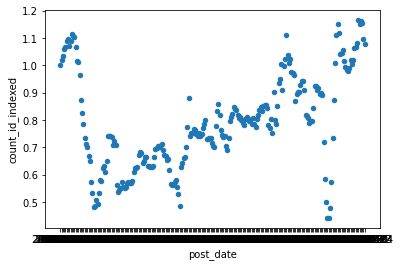

In [118]:
# original indexing 
test_df.plot.scatter(x = "post_date", y = "count_id_indexed")


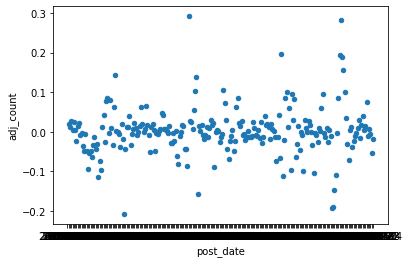

In [120]:
#adjusted indexing
test_df.plot.scatter(x = "post_date", y = "adj_count")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36c4ab150>,
      dtype=object)

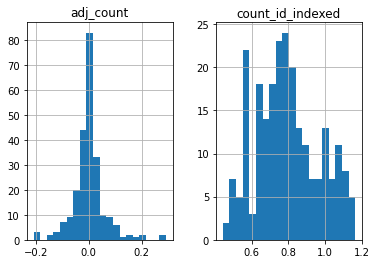

In [121]:
test_df.hist(bins=20)

The difference between those two plots is significant enough that I want to explore it further. I will likely move forward using the adjusted indexing, which has close to a normal distribution. 

I will now make plots of the national data, using both the adjusted indexing and the original indexing...

In [122]:
#calculate adjusted index 
adj_count_natl = merge_df1.count_id_indexed.pct_change()
adj_count_natl

merge_df1["adj_count_natl"] = adj_count_natl
merge_df1

,post_date,state,count_id_indexed,party,adj_count_natl
0,2020-03-01,AK,1.0000,republican,NaN
1,2020-03-02,AK,0.9743,republican,-0.025700
2,2020-03-03,AK,1.0293,republican,0.056451
3,2020-03-04,AK,1.0339,republican,0.004469
4,2020-03-05,AK,1.0358,republican,0.001838
...,...,...,...,...,...
11895,2020-10-20,WY,1.2428,republican,0.035926
11896,2020-10-21,WY,1.2498,republican,0.005632
11897,2020-10-22,WY,1.2562,republican,0.005121
11898,2020-10-23,WY,1.1166,republican,-0.111129


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd369c83310>]],
      dtype=object)

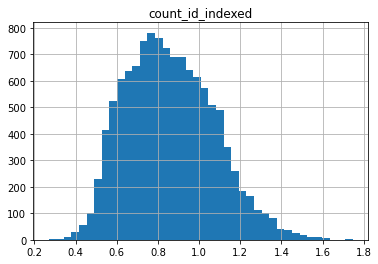

In [123]:
#histogram of national data with original indexing
merge_df1.hist(column="count_id_indexed", bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd383d42fd0>]],
      dtype=object)

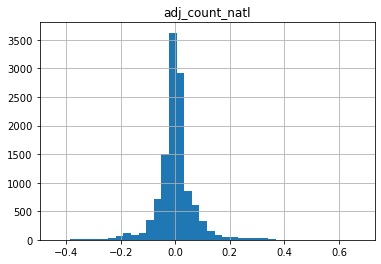

In [124]:
# histogram of national data with adjusted indexing
# once again we see a normal distribution
merge_df1.hist(column="adj_count_natl", bins=40)

Now, make histograms comparing Republican states and Democratic states...

In [141]:
# make dataframe of republican states 
repub_df = merge_df1[merge_df1.party == "republican"]
repub_df

,post_date,state,count_id_indexed,party,adj_count_natl
0,2020-03-01,AK,1.0000,republican,NaN
1,2020-03-02,AK,0.9743,republican,-0.025700
2,2020-03-03,AK,1.0293,republican,0.056451
3,2020-03-04,AK,1.0339,republican,0.004469
4,2020-03-05,AK,1.0358,republican,0.001838
...,...,...,...,...,...
11895,2020-10-20,WY,1.2428,republican,0.035926
11896,2020-10-21,WY,1.2498,republican,0.005632
11897,2020-10-22,WY,1.2562,republican,0.005121
11898,2020-10-23,WY,1.1166,republican,-0.111129


In [142]:
# make dataframe of democrat states 
dem_df = merge_df1[merge_df1.party == "democrat"]
dem_df

,post_date,state,count_id_indexed,party,adj_count_natl
952,2020-03-01,CA,1.0000,democrat,-0.220941
953,2020-03-02,CA,1.0062,democrat,0.006200
954,2020-03-03,CA,1.0125,democrat,0.006261
955,2020-03-04,CA,1.0305,democrat,0.017778
956,2020-03-05,CA,1.0467,democrat,0.015721
...,...,...,...,...,...
11657,2020-10-20,WV,1.5303,democrat,-0.000588
11658,2020-10-21,WV,1.5934,democrat,0.041234
11659,2020-10-22,WV,1.5915,democrat,-0.001192
11660,2020-10-23,WV,1.4564,democrat,-0.084888


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36fc35590>]],
      dtype=object)

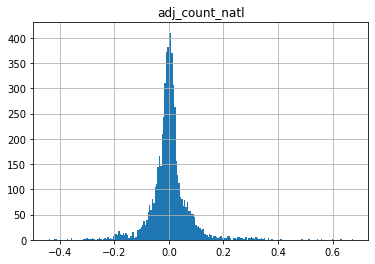

In [143]:
#make histogram of Republican states 
repub_df.hist(column="adj_count_natl", bins="auto")

In [152]:
# make more visually-appealing histogram, using plotly 
px.histogram(repub_df, x="adj_count_natl", nbins=30, color="party", title="Distribution of daily change in unemployment rate")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36dd97f10>]],
      dtype=object)

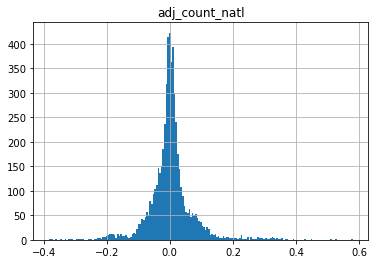

In [138]:
#make histogram of Democratic states 
dem_df.hist(column="adj_count_natl", bins="auto")

In [155]:
# make more visually-appealing histogram, using plotly 
px.histogram(dem_df, x="adj_count_natl", nbins=30, color="party", title="Distribution of daily change in unemployment rate")




In [135]:
#get stats on Republican dataframe... 
repub_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


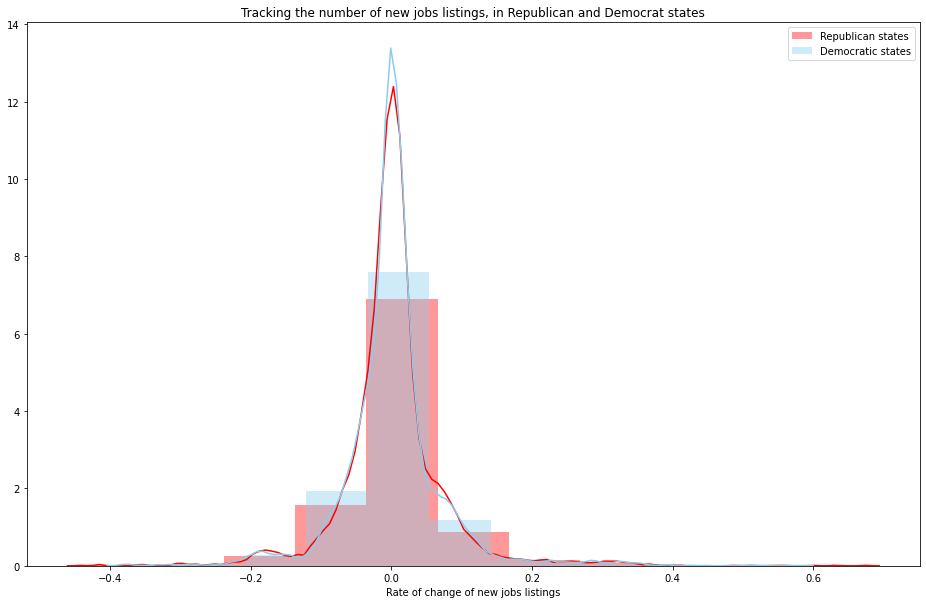

In [185]:
# overlay previous two histograms - that's easiest to do on plotly 

sns.distplot(repub_df["adj_count_natl"], bins=11, color="red", label = "Republican states", kde="False")

sns.distplot(dem_df["adj_count_natl"], bins=11, color="skyblue", label="Democratic states", kde="False")
fig = plt.gcf()
fig.set_size_inches(16,10)

plt.xlabel("Rate of change of new jobs listings")
plt.title("Tracking the number of new jobs listings, in Republican and Democrat states")
plt.legend()

fig.savefig('image/double_histogram.png')


In [ ]:
#get stats on Democratic dataframe... 
dem_df.describe()


The plots and stats suggests that there is very little difference in the mean of new jobs listings, when comparing Republican-led and Democrat-led states. 

Both the Republican and Democrat data show a normal distribution with a tall and skinny curve. 

Since the adjusted-count data has a normal distribution, I can use a t-test to test my hypothesis, using the standard 0.05 level of significance. 


In [ ]:
stats.ttest_ind(dem_df["adj_count_natl"].dropna(), repub_df["adj_count_natl"].dropna(), equal_var=False)

The p-value, or likelihood that the null hypothesis is true, is .74. In order to reject the null hypothesis, I would have needed a p-value less than or equal to the standard level of significance of 0.05. 


### Why does this matter?
I can conclude that the data shows, overwhelmingly, that there is no significant difference between new jobs listings in Republican-led states as compared to Democrat-led states, during the time period covered by the data. 

Given the political division and economic volatility that have marked the U.S. since March, it's fascinating to see that - according to the analysis here - the economic situtaion as measured by new jobs numbers is nearly identical in both Republican and Democratic states.

As a journalist - what have I learned from this? I've learned that knowing the political leaning of a state should not lead to any quick and easy conclusions about the economic reality of that state. 

More broadly, it's told me that journalists, analysts, and commentators would benefit from questioning some of our most deeply-held and seemingly "informed" assumptions. Political reporting - my own included - often starts by examining what divides us. That's what's easy to see, and it's usually easy to report and easy to comment on. 

Data-driven reporting - even a fairly simple and straightforward analysis - is a useful tool to question our assumptions and create a more informed baseline for political coverage. 